<a href="https://colab.research.google.com/github/Joojina/project_final/blob/master/imdb_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import ast
%matplotlib inline

In [0]:
df=pd.read_csv("ss_imdb_movies.csv", error_bad_lines=False, encoding='CP949')

C:\Users\103-04\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df.isnull().sum(axis=1) # 74550개의 imdb 자료

0        0
1        0
2        0
3        0
4        0
        ..
74546    5
74547    4
74548    7
74549    6
74550    4
Length: 74551, dtype: int64

In [0]:
df.head(1)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,s_year
0,tt4154796,Avengers: Endgame,Avengers: Endgame,2019,2019-04-25,"Action, Adventure, Drama",181,USA,"English, Japanese, Xhosa, German","Anthony Russo, Joe Russo",...,After the devastating events of,8.5,602792,356000000.0,858373000.0,2.797801e+09,78.0,8302.0,531.0,10s


In [0]:

df.rename(columns={'title':'제목','year':'개봉년','genre':'장르','country':'국가', 'language':'언어','budget':'예산','usa_gross_income':'수익1-USA','worlwide_gross_income':'수익2-WW'}, inplace=True)

In [0]:
df.dropna(0, inplace=True)

In [0]:

df.drop(0, inplace=True)

In [0]:
df.drop(['imdb_title_id','original_title','date_published','duration','director','writer','production_company','actors','description','avg_vote','votes','metascore','reviews_from_users','reviews_from_critics'], axis=1, inplace=True)

In [0]:
df.isnull().sum(axis=0)

title                    0
year                     0
genre                    0
country                  0
language                 0
budget                   0
usa_gross_income         0
worlwide_gross_income    0
s_year                   0
dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5909 entries, 0 to 26237
Data columns (total 9 columns):
title                    5909 non-null object
year                     5909 non-null int64
genre                    5909 non-null object
country                  5909 non-null object
language                 5909 non-null object
budget                   5909 non-null float64
usa_gross_income         5909 non-null float64
worlwide_gross_income    5909 non-null float64
s_year                   5909 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 461.6+ KB


In [0]:
df.fillna('0', inplace=True)

In [0]:
df.head(1)

,제목,개봉년,장르,국가,언어,예산,수익1-USA,수익2-WW,s_year
1,Avatar,2009,"Action, Adventure, Fantasy",USA,"English, Spanish",237000000.0,760507625.0,2.789968e+09,00s


In [0]:
df['장르_1'] = df.장르.str.split(',').str[0]

AttributeError: 'DataFrame' object has no attribute '장르'

In [0]:
df.head(10)

,제목,개봉년,장르,국가,언어,예산,수익1-USA,수익2-WW,s_year,장르_1,국가_1,언어_1
1,Avatar,2009,"Action, Adventure, Fantasy",USA,"English, Spanish",2.37e+08,7.60508e+08,2.78997e+09,00s,Action,USA,English
2,Titanic,1997,"Drama, Romance",USA,"English, Swedish, Italian",2e+08,6.59364e+08,2.18746e+09,90s,Drama,USA,English
3,Star Wars: Episode VII - The Force Awakens,2015,"Action, Adventure, Sci-Fi",USA,English,2.45e+08,9.36662e+08,2.06822e+09,10s,Action,USA,English
4,Avengers: Infinity War,2018,"Action, Adventure, Sci-Fi",USA,English,3.21e+08,6.78815e+08,2.04836e+09,10s,Action,USA,English
5,Jurassic World,2015,"Action, Adventure, Sci-Fi",USA,English,1.5e+08,6.52271e+08,1.6704e+09,10s,Action,USA,English
6,The Lion King,2019,"Animation, Adventure, Drama",USA,English,2.6e+08,5.43497e+08,1.65516e+09,10s,Animation,USA,English
7,The Avengers,2012,"Action, Adventure, Sci-Fi",USA,"English, Russian, Hindi",2.2e+08,6.23358e+08,1.51881e+09,10s,Action,USA,English
8,Furious Seven,2015,"Action, Adventure, Thriller","USA, China, Japan, Canada, United Arab Emirates","English, Thai, Arabic, Spanish",1.9e+08,3.53007e+08,1.51505e+09,10s,Action,USA,English
9,Avengers: Age of Ultron,2015,"Action, Adventure, Sci-Fi",USA,"English, Korean",2.5e+08,4.59006e+08,1.40281e+09,10s,Action,USA,English
10,Black Panther,2018,"Action, Adventure, Sci-Fi",USA,"English, Swahili, Nama, Xhosa, Korean",2e+08,7.0006e+08,1.34691e+09,10s,Action,USA,English


C:\Users\103-04\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\103-04\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\103-04\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\103-04\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0, flags=flags)


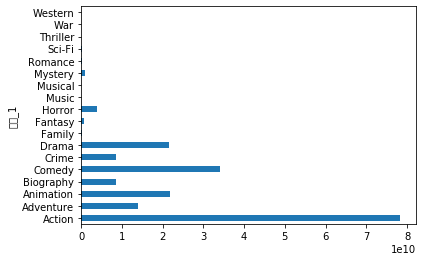

In [0]:
df.groupby('장르_1')['예산'].sum().plot(kind='barh') 
# 예산을 많이 쓴 장르 : 액션, 코메디, 드라마, 애니메이션, 어드벤쳐 순

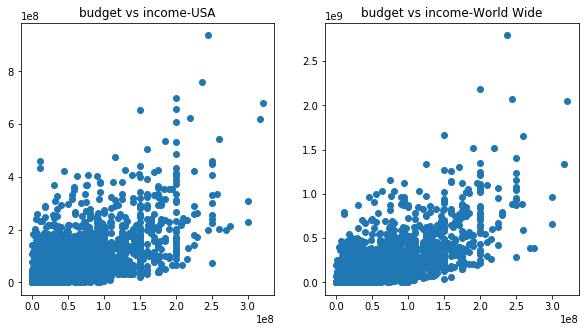

In [0]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['예산'], df['수익1-USA'])
plt.title('budget vs income-USA');
plt.subplot(1, 2, 2)
plt.scatter(df['예산'], df['수익2-WW'])
plt.title('budget vs income-World Wide');
# 예산과 수입의 상관관계

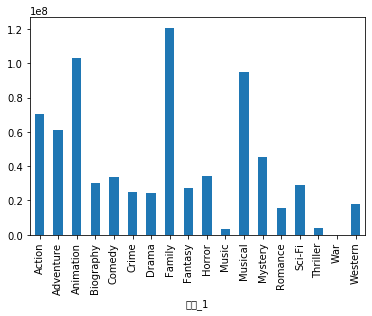

In [0]:
df.groupby('장르_1')['수익1-USA'].mean().plot(kind='bar')
# 미국에서 수익성이 가장 좋은 장르는

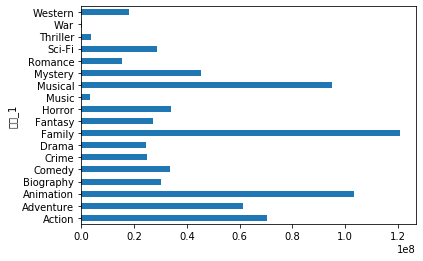

In [0]:
df.groupby('장르_1')['수익1-USA'].mean().plot(kind='barh')
# 미국에서 수익성이 가장 좋은 장르는

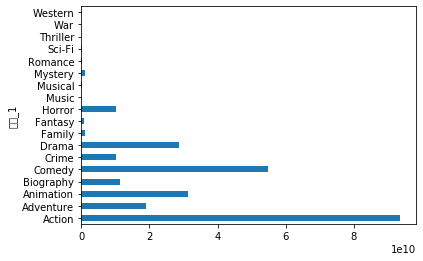

In [0]:
df.groupby('장르_1')['수익1-USA'].sum().plot(kind='barh')
# 미국에서 수익성이 가장 좋은 장르는

In [0]:
df['국가_1'] = df.국가.str.split(',').str[0]

In [0]:
df['언어_1'] = df.언어.str.split(',').str[0]

In [0]:
df.head()

,title,year,genre,country,language,budget,usa_gross_income,worlwide_gross_income,s_year
0,Avengers: Endgame,2019,"Action, Adventure, Drama",USA,"English, Japanese, Xhosa, German",356000000.0,858373000.0,2.797801e+09,10s
1,Avatar,2009,"Action, Adventure, Fantasy",USA,"English, Spanish",237000000.0,760507625.0,2.789968e+09,00s
2,Titanic,1997,"Drama, Romance",USA,"English, Swedish, Italian",200000000.0,659363944.0,2.187464e+09,90s
3,Star Wars: Episode VII - The Force Awakens,2015,"Action, Adventure, Sci-Fi",USA,English,245000000.0,936662225.0,2.068224e+09,10s
4,Avengers: Infinity War,2018,"Action, Adventure, Sci-Fi",USA,English,321000000.0,678815482.0,2.048360e+09,10s


In [0]:
### 모델링 start

In [0]:
y = df['worlwide_gross_income']
x = df[['budget', 'usa_gross_income', 'genre', 's_year']] #'s_year(세대별), 제일 높은 값 나옴

In [0]:
x

,budget,usa_gross_income,genre,s_year
0,356000000.0,858373000.0,"Action, Adventure, Drama",10s
1,237000000.0,760507625.0,"Action, Adventure, Fantasy",00s
2,200000000.0,659363944.0,"Drama, Romance",90s
3,245000000.0,936662225.0,"Action, Adventure, Sci-Fi",10s
4,321000000.0,678815482.0,"Action, Adventure, Sci-Fi",10s
...,...,...,...,...
25910,250000.0,1610.0,Sci-Fi,90s
25941,3000000.0,1500.0,"Drama, Mystery, Thriller",00s
26035,1500000.0,1000.0,"Comedy, Drama",00s
26122,5000000.0,625.0,"Crime, Drama",10s


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5909 entries, 0 to 26237
Data columns (total 9 columns):
title                    5909 non-null object
year                     5909 non-null int64
genre                    5909 non-null object
country                  5909 non-null object
language                 5909 non-null object
budget                   5909 non-null float64
usa_gross_income         5909 non-null float64
worlwide_gross_income    5909 non-null float64
s_year                   5909 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 461.6+ KB


In [0]:
x.shape

(5909, 4)

In [0]:
y.shape

(5909,)

In [0]:
x.head()

,budget,usa_gross_income,genre,s_year
0,356000000.0,858373000.0,"Action, Adventure, Drama",10s
1,237000000.0,760507625.0,"Action, Adventure, Fantasy",00s
2,200000000.0,659363944.0,"Drama, Romance",90s
3,245000000.0,936662225.0,"Action, Adventure, Sci-Fi",10s
4,321000000.0,678815482.0,"Action, Adventure, Sci-Fi",10s


In [0]:
x = pd.get_dummies(x, drop_first=True)

In [0]:
x.head()

,budget,usa_gross_income,"genre_Action, Adventure","genre_Action, Adventure, Biography","genre_Action, Adventure, Comedy","genre_Action, Adventure, Crime","genre_Action, Adventure, Drama","genre_Action, Adventure, Family","genre_Action, Adventure, Fantasy","genre_Action, Adventure, History",...,s_year_1982,s_year_1983,s_year_1984,s_year_1985,s_year_1986,s_year_1987,s_year_1988,s_year_1989,s_year_1990,s_year_90s
0,356000000.0,858373000.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,237000000.0,760507625.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,200000000.0,659363944.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,245000000.0,936662225.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,321000000.0,678815482.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, \
                                                    random_state=77)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lr = LinearRegression()

In [0]:
lr.fit(x_train, y_train)
lr.score(x_test, y_test) # fit으로 학습

0.9022951289609461

In [0]:
from sklearn import metrics
import numpy as np

In [0]:
predictions = lr.predict(x_test)

In [0]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [0]:
print('MSE:',mean_squared_error(y_test, predictions))
print('RMSE:',np.sqrt(mean_squared_error(y_test, predictions)))
print('MAE:',mean_absolute_error(y_test, predictions))
print('R**2:',lr.score(x_test, y_test))# 1에 가까울 수록 좋음.

MSE: 2408269356436343.0
RMSE: 49074121.04598862
MAE: 32023449.213374965
R**2: 0.9022951289609461


ValueError: y_true and y_pred have different number of output (2!=1)